<a href="https://colab.research.google.com/github/Asaad123/Final-Project-/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv

In [2]:
first_dataframe=pd.read_csv('notebook.csv')

In [3]:
import numpy as np


In [4]:
N1=first_dataframe.N1
new_N1 = np.ma.masked_where(N1 == 0, N1)
print(new_N1)

N2=first_dataframe.N2
new_N2= np.ma.masked_where(N2==0, N2)
print(new_N2)




[0.01 0.013000000000000001 0.045 -- -- 0.057999999999999996 0.01 -- -- --]
[-- -- -- 0.25 0.7 -- -- 3.5 5.2 5.7]


In [5]:
from matplotlib import pyplot as plt 


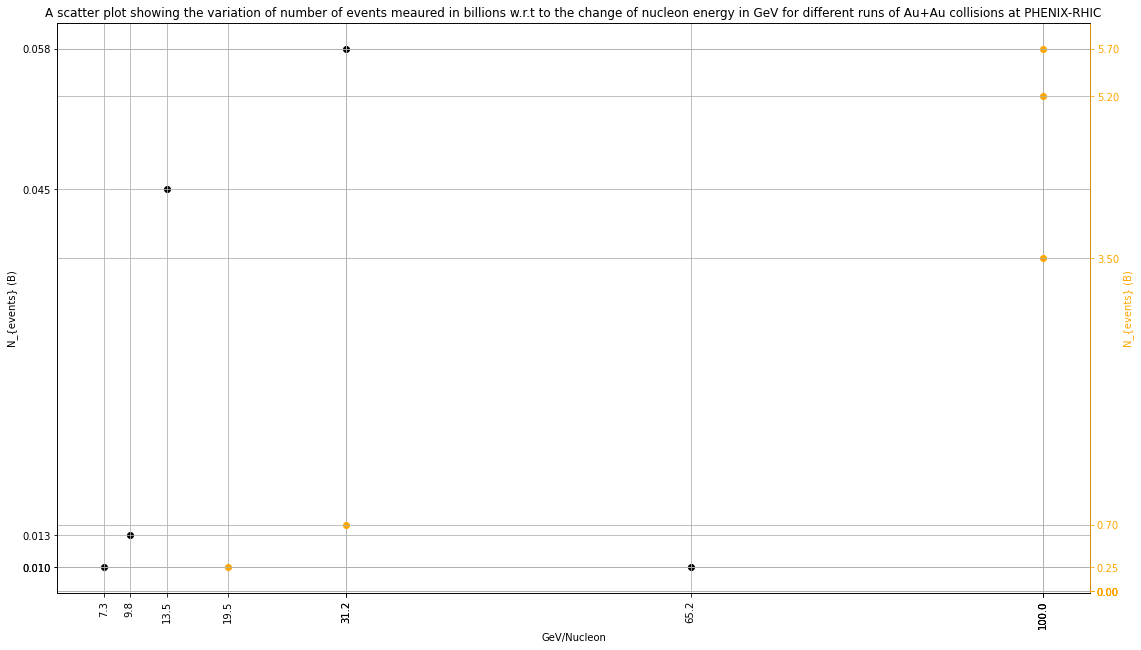

In [15]:
fig, ax=plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(first_dataframe.GeV,new_N1,color='black') 
plt.xticks(first_dataframe.GeV)
plt.xticks(rotation=90)
ax.set_xlabel('GeV/Nucleon')
ax.set_yticks(new_N1)
ax.set_ylabel('N_{events} (B)')

ax2=ax.twinx()
ax2.scatter(first_dataframe.GeV,new_N2,color='orange')
ax2.set_yticks(first_dataframe['N2'])
ax2.set_ylabel('N_{events} (B)', color='orange')
ax2.tick_params(colors='orange')
ax2.spines['right'].set_color('orange')

plt.title('A scatter plot showing the variation of number of events meaured in billions w.r.t to the change of nucleon energy in GeV for different runs of Au+Au collisions at PHENIX-RHIC')
ax.xaxis.grid()
ax.yaxis.grid()
ax2.yaxis.grid()
plt.show()



In [16]:
gev=first_dataframe.GeV
new_gev= np.ma.masked_where(gev != 100, gev)
print(new_gev)




[-- -- -- -- -- -- -- 100.0 100.0 100.0]


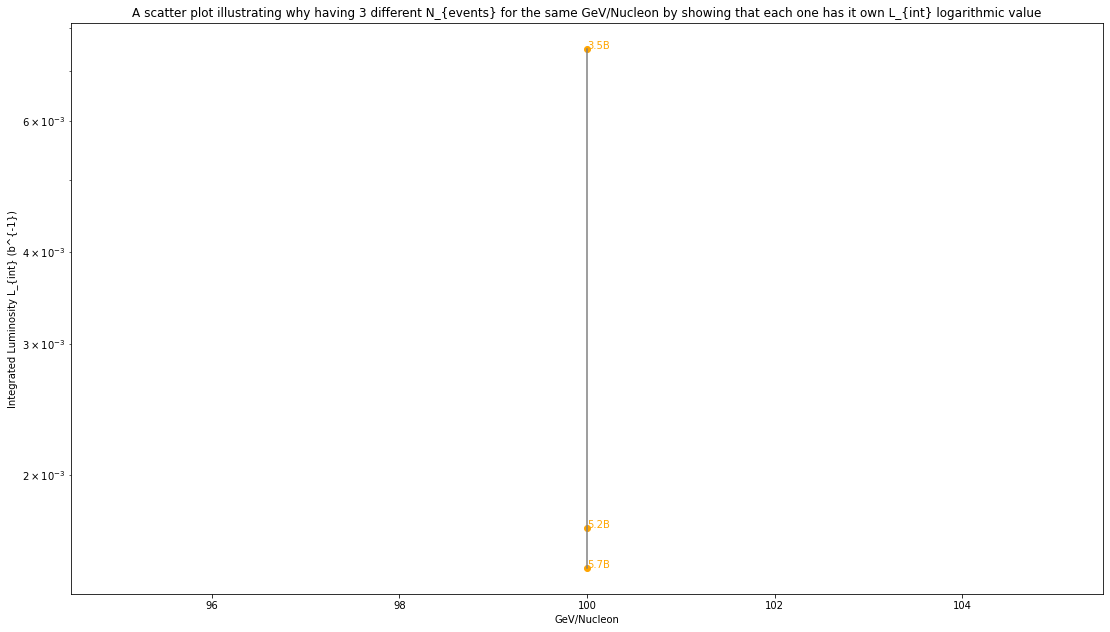

In [18]:
#Notice that in the above scatter plot, there are 3 different N_{events} for the same energy/nucleon at the value
#100 GeV/Nucleon. It seems at first that such thing is not logical, but in the following cell we will demostrate 
#why this can happen.

fig, ax=plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(new_gev,first_dataframe.L,color='orange') # integrated luminosity is meaured in barn^{-1} where 1b^{-1} is approximately 100 fm^{2}
ax.plot(new_gev,first_dataframe.L,color='gray')
plt.yticks(first_dataframe.L)
ax.text(100,0.0075,"3.5B",color='orange')
ax.text(100,0.0017,"5.2B",color='orange')
ax.text(100,0.0015,"5.7B",color='orange')
ax.set_yscale('log')
ax.set_xlabel('GeV/Nucleon')
ax.set_ylabel('Integrated Luminosity L_{int} (b^{-1})')
plt.title('A scatter plot illustrating why having 3 different N_{events} for the same GeV/Nucleon by showing that each one has it own L_{int} logarithmic value')
plt.show()









In [22]:
from math import pi


In [23]:
#Recall that gev is an array containing the first column in the dataframe which consists of E/Nucleon (GeV) for the different runs of Au-Au collisions
#ECOM will denote the name of a list containing the different center of mass energies meaured in GeV
ECOM=[]
for x in gev:
  ECOM.append(x*197*2) # 197 is the number of nucleons in a gold nucleus, and the factor 2 is because we have 2 gold nuclei 
print(ECOM)
#ED will denote the name of a list containing the different formed energy densities meaured in GeV/fm^{3}
ED=[] 
for y in ECOM:
   ED.append(y/(pi*(7**2)*0.92)) # the factor pi*(7**2)*0.92 is the approximated volume of a nucleon in Au nucleus 
   print(ED) # Recall that if ED is less than 0.4 GeV/fm^{3} then no quark-gluon plasma (QGP) formation at collision 
   for z in ED:
     if z<0.4:
       break
     else: 
       print(z,'forms a GQP')
print(ED) 


    


[2876.2, 3861.2000000000003, 5319.0, 7683.0, 12292.8, 12292.8, 25688.800000000003, 39400.0, 39400.0, 39400.0]
[20.308848594539015]
20.308848594539015 forms a GQP
[20.308848594539015, 27.26393372965512]
20.308848594539015 forms a GQP
27.26393372965512 forms a GQP
[20.308848594539015, 27.26393372965512, 37.55745972962695]
20.308848594539015 forms a GQP
27.26393372965512 forms a GQP
37.55745972962695 forms a GQP
[20.308848594539015, 27.26393372965512, 37.55745972962695, 54.24966405390559]
20.308848594539015 forms a GQP
27.26393372965512 forms a GQP
37.55745972962695 forms a GQP
54.24966405390559 forms a GQP
[20.308848594539015, 27.26393372965512, 37.55745972962695, 54.24966405390559, 86.79946248624894]
20.308848594539015 forms a GQP
27.26393372965512 forms a GQP
37.55745972962695 forms a GQP
54.24966405390559 forms a GQP
86.79946248624894 forms a GQP
[20.308848594539015, 27.26393372965512, 37.55745972962695, 54.24966405390559, 86.79946248624894, 86.79946248624894]
20.308848594539015 forms

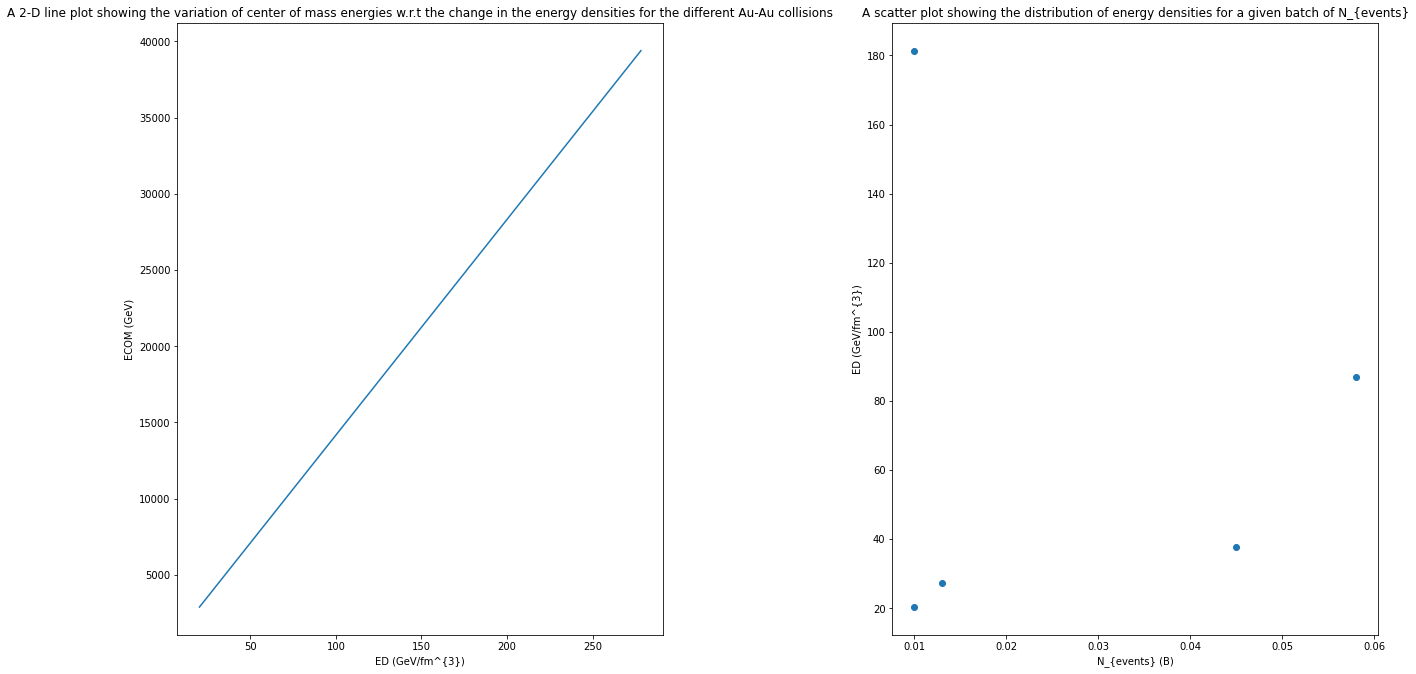

In [25]:
#The purpose of this cell is just to plot the above calulated data 

fig, ax=plt.subplots(1,2,figsize=(20,10))
ax[0].plot(ED,ECOM)
ax[0].set_ylabel('ECOM (GeV)')
ax[0].set_xlabel('ED (GeV/fm^{3})')
ax[0].set_title('A 2-D line plot showing the variation of center of mass energies w.r.t the change in the energy densities for the different Au-Au collisions')

ax[1].scatter(new_N1,ED)
ax[1].set_ylabel('ED (GeV/fm^{3})')
ax[1].set_xlabel('N_{events} (B)')
ax[1].set_title('A scatter plot showing the distribution of energy densities for a given batch of N_{events}')

fig.tight_layout(pad=3.0)
plt.show()